In [1]:
!pip install -r requirements.txt

In [2]:
import pandas as pd
from model import Model
from agent import Agent

In [3]:
window_size = 30
layer_size = 500
output_size = 3
money = 10000
skip = 1
iterations = 500
checkpoint = 10

In [4]:
df = pd.read_csv('./dataset/BTC-USD.csv')
close = df.Close.values.tolist()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-11-30,7764.057129,7836.102051,7515.849609,7569.629883,7569.629883,17158194786
1,2019-12-01,7571.616211,7571.616211,7291.341797,7424.292480,7424.292480,18720708479
2,2019-12-02,7424.036133,7474.818848,7233.399414,7321.988281,7321.988281,17082040705
3,2019-12-03,7323.975586,7418.858887,7229.356934,7320.145508,7320.145508,14797485769
4,2019-12-04,7320.125000,7539.784668,7170.922852,7252.034668,7252.034668,21664240918


In [5]:
model = Model(window_size, layer_size, output_size)
agent = Agent(model, money, close, window_size, skip)
agent.fit(iterations, checkpoint)

iter 10. reward: 419.827037
iter 20. reward: 632.723339
iter 30. reward: 631.747313
iter 40. reward: 674.940135
iter 50. reward: 832.822224
iter 60. reward: 953.383915
iter 70. reward: 814.493847
iter 80. reward: 1070.879962
iter 90. reward: 976.801149
iter 100. reward: 1135.328318
iter 110. reward: 1089.015797
iter 120. reward: 1063.362799
iter 130. reward: 1102.260128
iter 140. reward: 1115.877203
iter 150. reward: 1089.929122
iter 160. reward: 1140.700151
iter 170. reward: 1217.518367
iter 180. reward: 1239.385241
iter 190. reward: 1330.349043
iter 200. reward: 1395.293994
iter 210. reward: 1121.119335
iter 220. reward: 1252.337996
iter 230. reward: 1341.626371
iter 240. reward: 1419.304507
iter 250. reward: 1441.515985
iter 260. reward: 1424.234323
iter 270. reward: 1514.377617
iter 280. reward: 1462.045049
iter 290. reward: 1518.502053
iter 300. reward: 1478.715980
iter 310. reward: 1529.243177
iter 320. reward: 1535.042401
iter 330. reward: 1522.073475
iter 340. reward: 1508.8248

.000000, total balance 0.000000, quantity 1.329316
day 10, sell 1 units at price 9674.924145, investment -3.562701 %, total balance 9674.924145, quantity 0.000000
day 14: buy 1 units at price 7124.673828, total balance 2550.250317, quantity 1.000000
day 15, sell 1 units at price 7152.301758, investment 0.000000 %, total balance 9702.552075, quantity 0.000000
day 16: buy 1 units at price 9702.552075, total balance 0.000000, quantity 1.399579
day 17: buy 0 units at price 0.000000, total balance 0.000000, quantity 1.399579
day 18, sell 1 units at price 10184.458186, investment 0.000000 %, total balance 10184.458186, quantity 0.000000
day 19: buy 1 units at price 10184.458186, total balance 0.000000, quantity 1.413950
day 20, sell 1 units at price 10207.042026, investment 0.000000 %, total balance 10207.042026, quantity 0.000000
day 21: buy 1 units at price 10207.042026, total balance 0.000000, quantity 1.419388
day 23: buy 0 units at price 0.000000, total balance 0.000000, quantity 1.4193

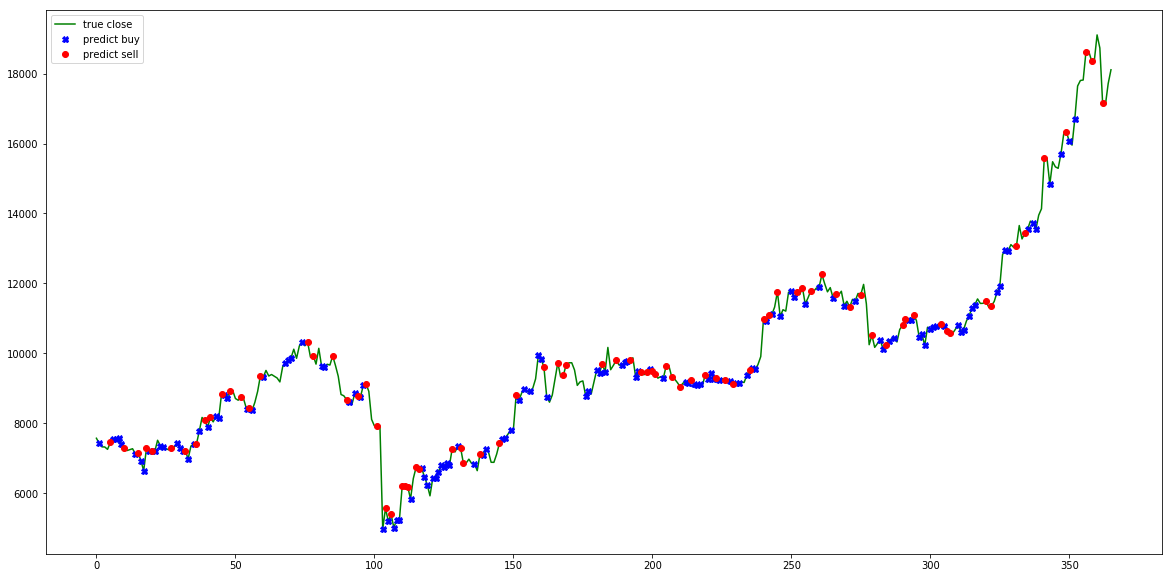

In [6]:
agent.simulate()